Q1: Take a night time photo with your phone camera and try to enhance it by manipulating its histogram and reducing noise. It should still look natural ad like a night time photo, but more details should be apparent than before.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


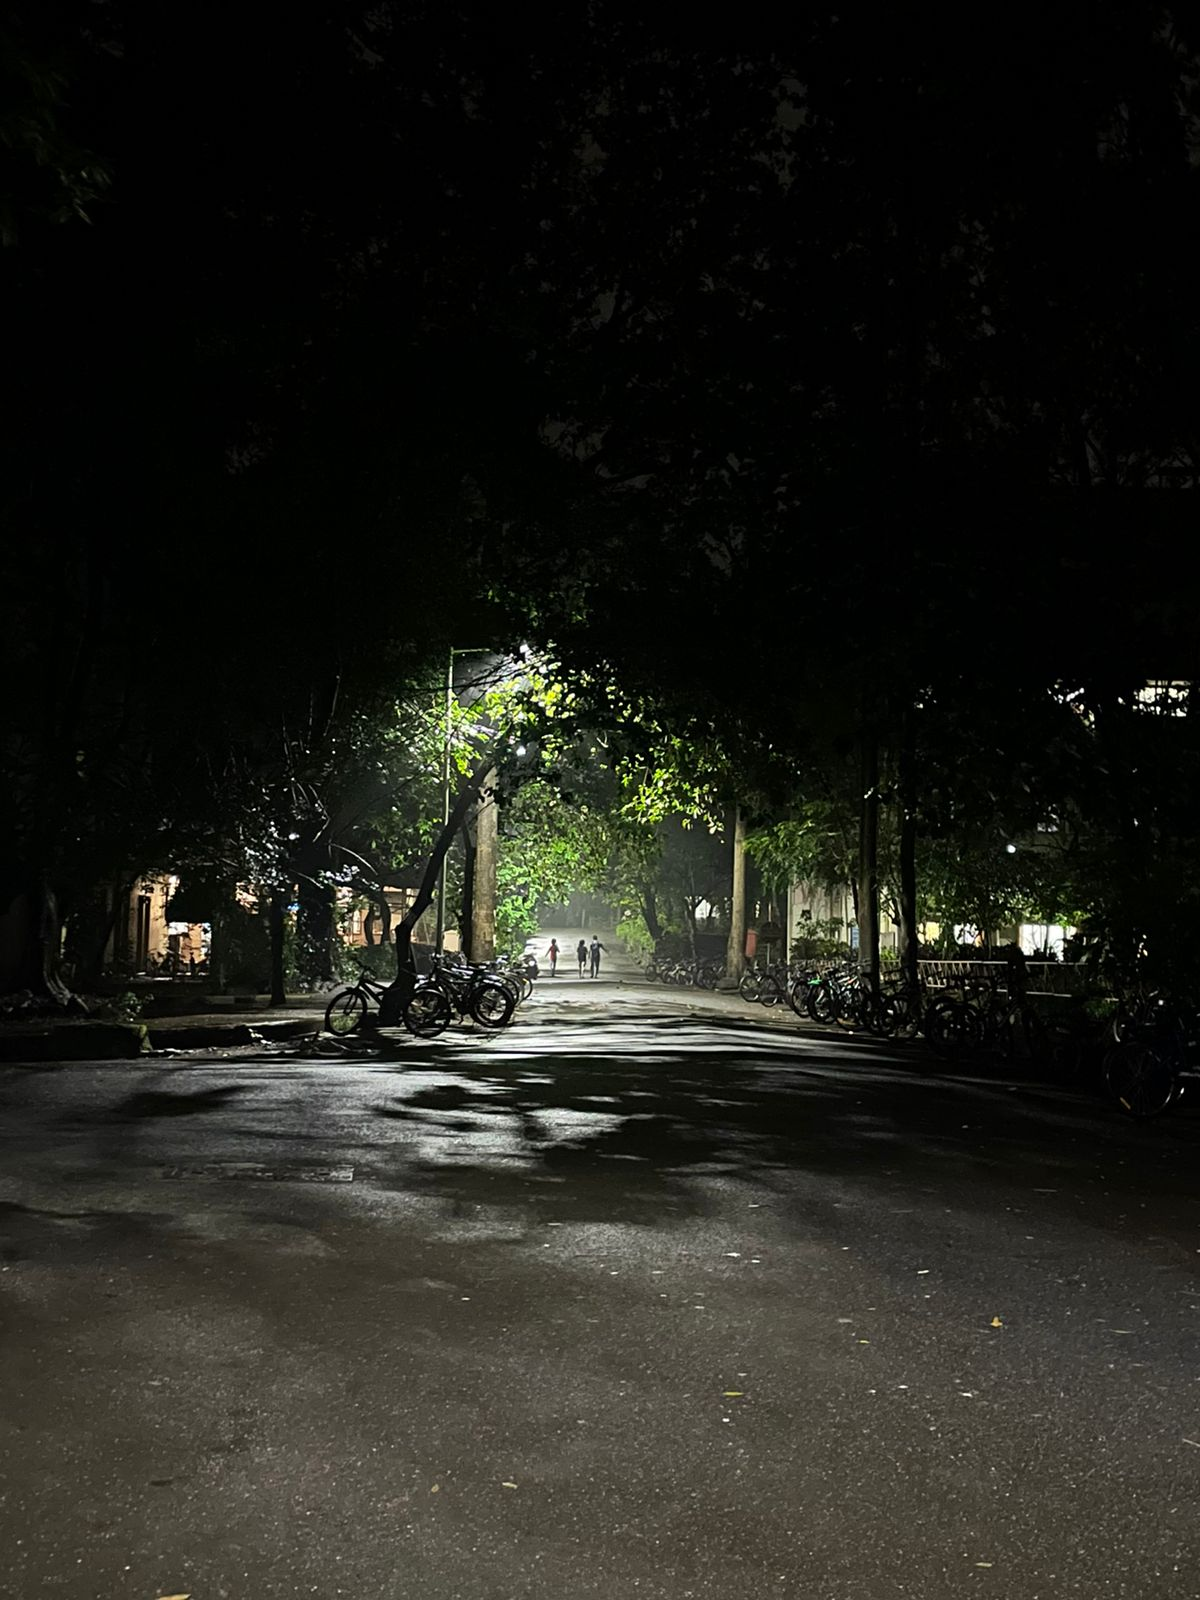

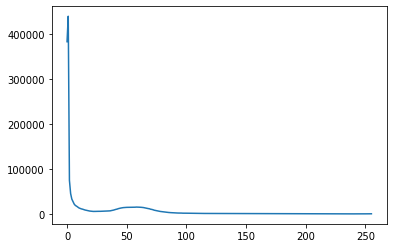

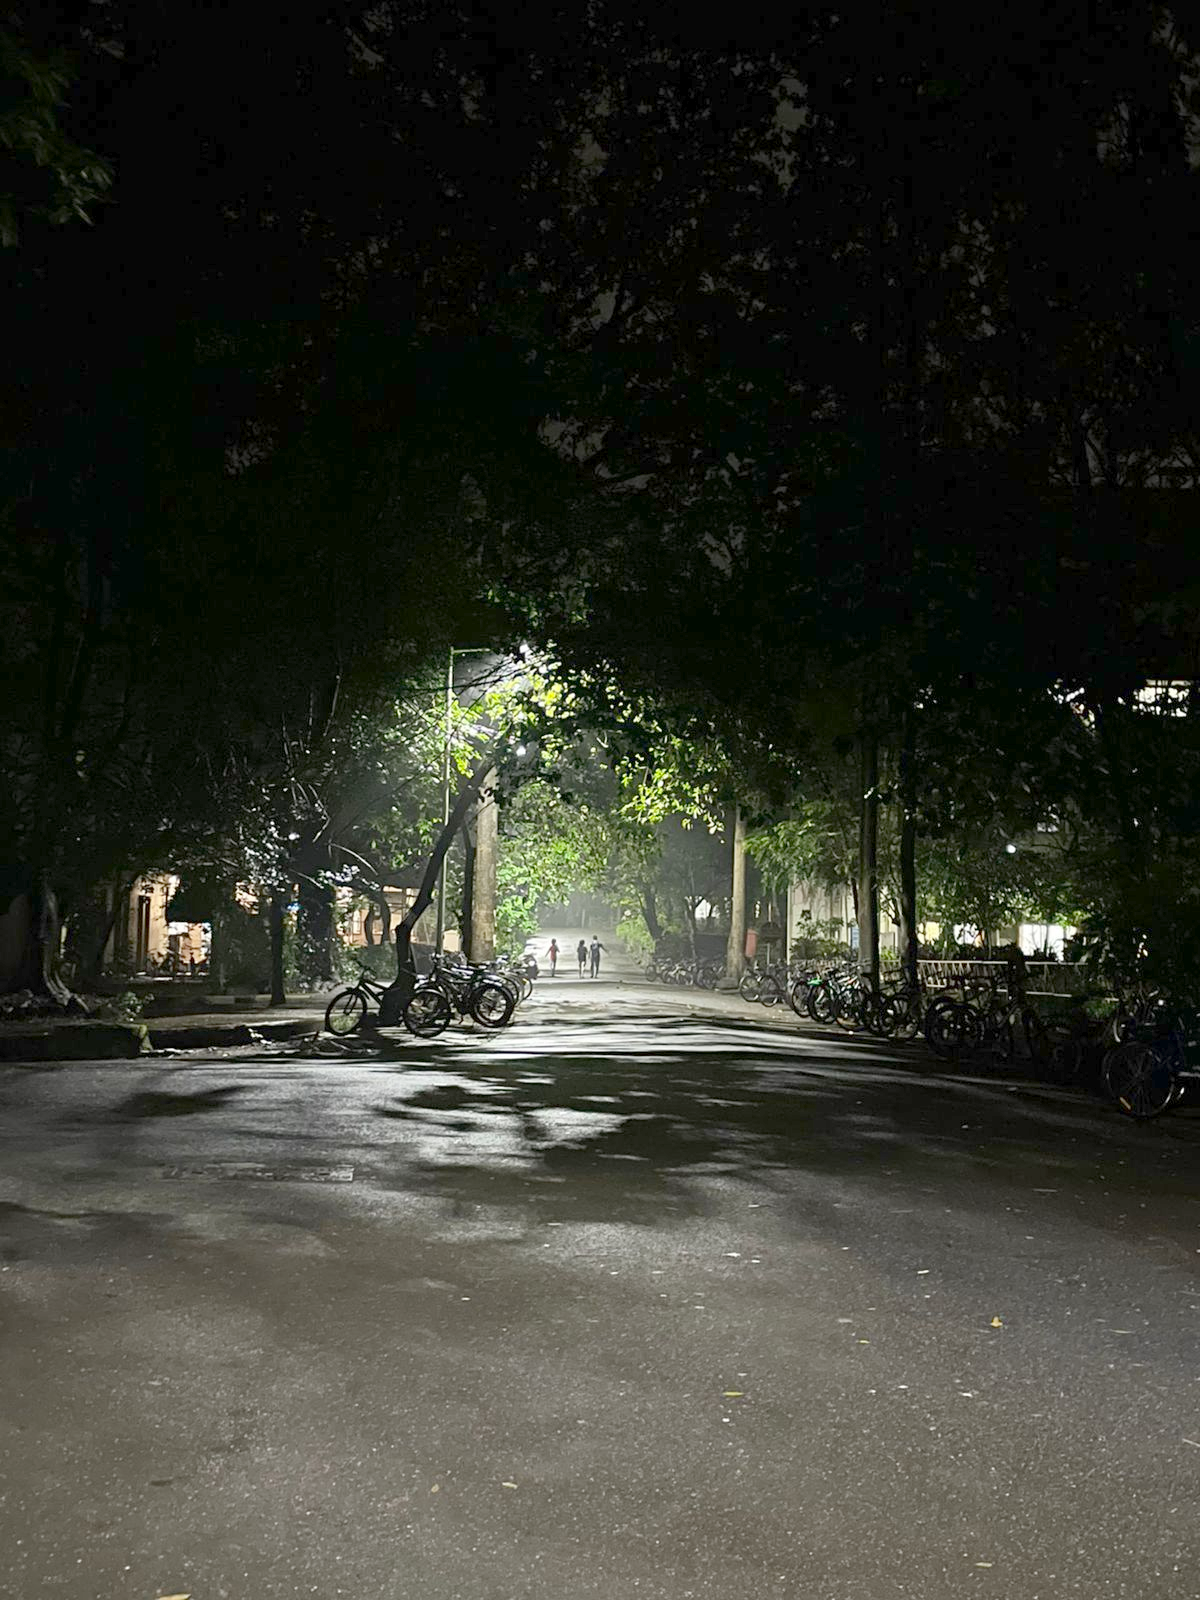

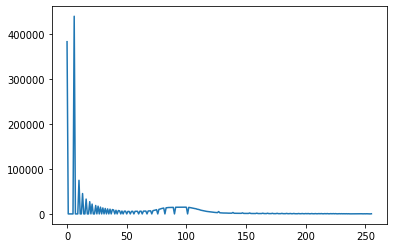

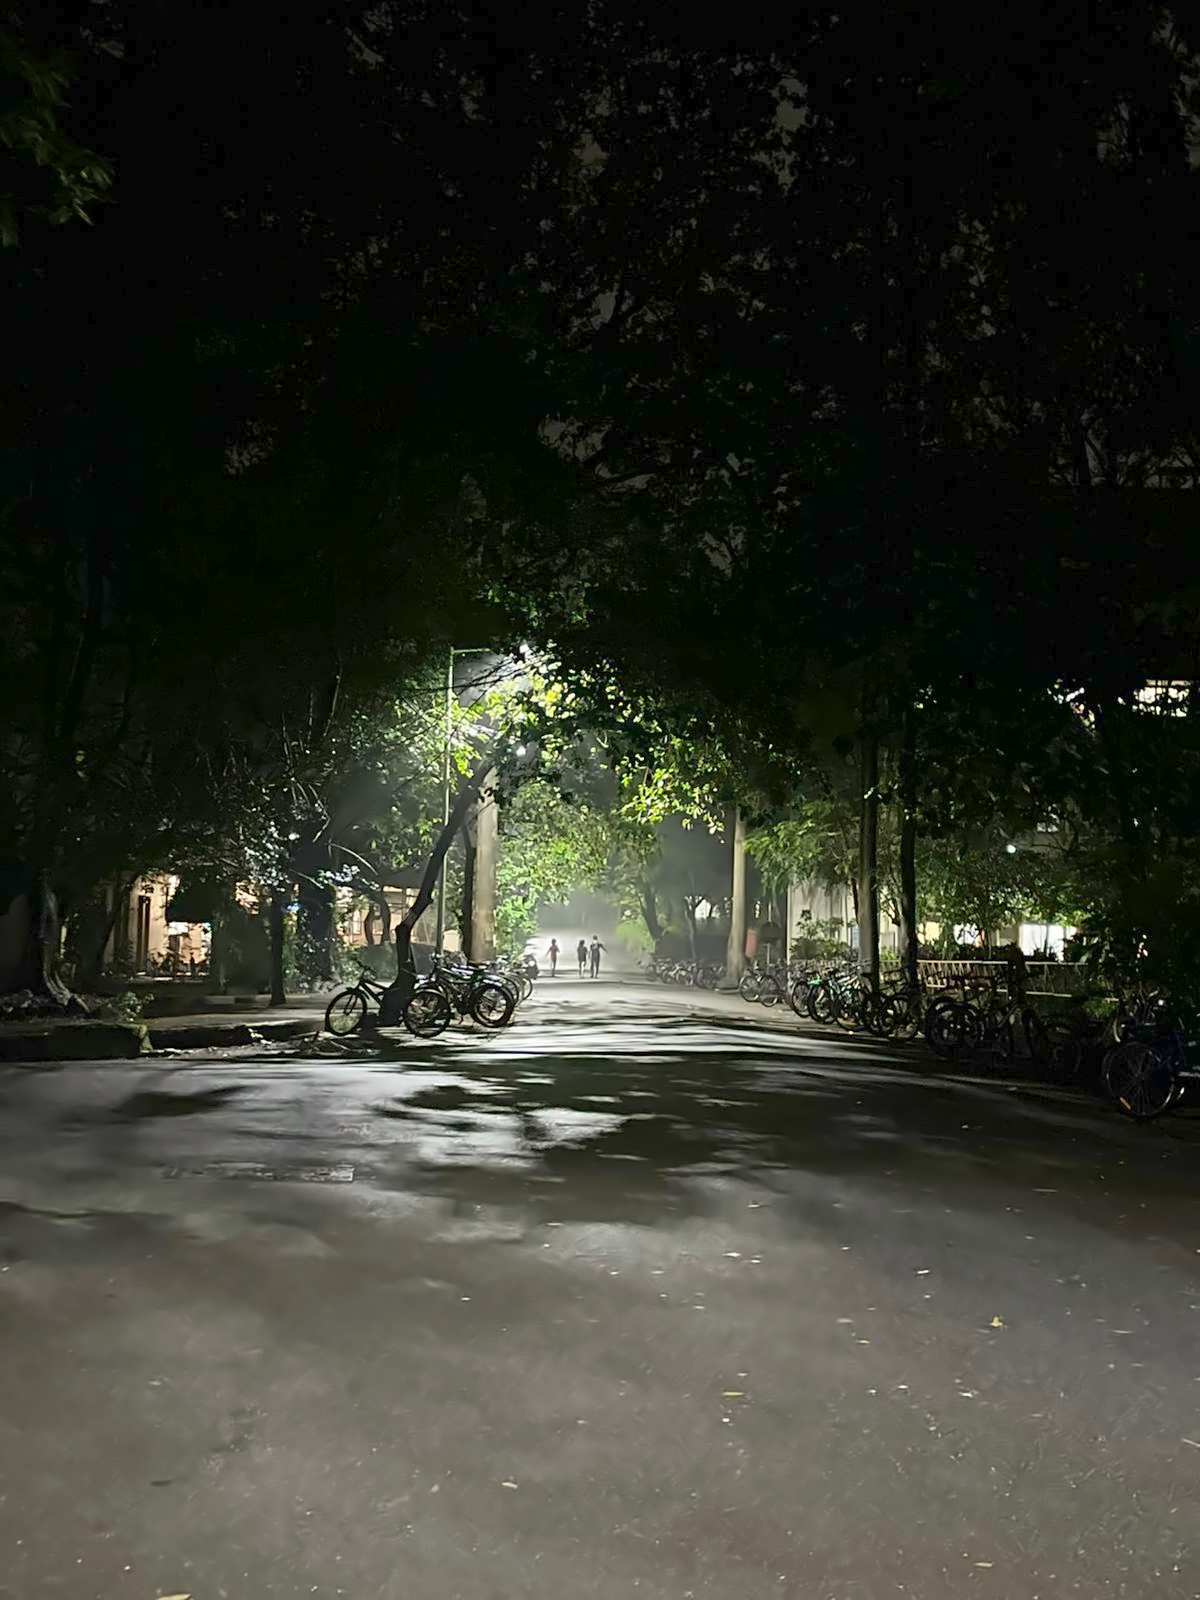

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
#reading image
n=cv2.imread('/content/drive/MyDrive/EE610/night1.jpeg')
#original image
cv2_imshow(n)
#predefiend function of histogram
h=cv2.calcHist([n],[0],None,[256],[0,256])
#plotting histrogram
plt.plot(h)
plt.show()
#applying gamma correction for enhancing the image
gamma=0.655
gn = np.array(255*(n/255)**gamma, dtype = 'uint8')
cv2_imshow(gn)
#plotting histogram of enhanced image
gh=cv2.calcHist([gn],[0],None,[256],[0,256])
plt.plot(gh)
plt.show()
dgn = cv2.fastNlMeansDenoisingColored(gn, None,7, 7, 10, 10)
#source = OpenCV docs
cv2_imshow(dgn)

Q2:Remove the newspaper-ink-dot effect and try to make the image at https://momofilmfest.com/wp-content/uploads/2020/01/newspaper-dots.jpg more natural-looking.

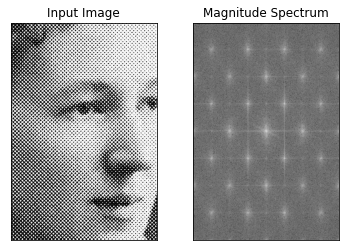

320
477


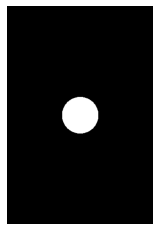

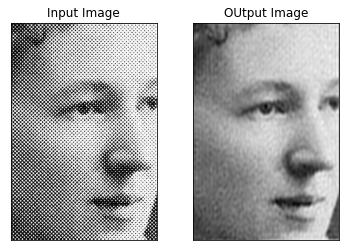

In [ ]:
img = cv2.imread('/content/drive/MyDrive/EE610/newspaper-dots.jpg',0)
#DFT of image
#source:https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         
m = magnitude_spectrum
#size of image
w = m.shape[1]
l = m.shape[0]
print(w)
print(l)
#Ideal filter
h = np.zeros((l,w,2), dtype = np.float32) 
D0 = 40
for u in range(l):
  for v in range(w):
    D = np.sqrt((u-l/2)**2 + (v-w/2)**2)
    if D <= D0:
      h[u,v,:] = 1
    else:
      h[u,v,:] = 0
plt.imshow(h[:,:,0], cmap = 'gray')
plt.axis('off')
plt.show()

#m1 = h*m
#cv2_imshow(m1)
#taking IDFT
#source:https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.
fshift = dft_shift*h #masking
m12 = np.fft.ifftshift(fshift)
img_back = cv2.idft(m12)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('OUtput Image'), plt.xticks([]), plt.yticks([])
plt.show()


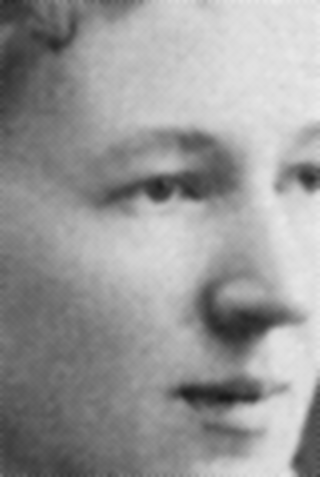

In [ ]:
#2nd approach
#using GausianBlur filter
#source:https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
ga1 = cv2.GaussianBlur(img, (7,7), 0)
#cv2_imshow(ga1)
ga2 = cv2.GaussianBlur(ga1, (7,7), 0)
#cv2_imshow(ga2)
ga3 = cv2.GaussianBlur(ga2, (7,7), 0)
#cv2_imshow(ga3)
ga4 = cv2.GaussianBlur(ga3, (7,7), 0)
cv2_imshow(ga4)

Q3:Triton is the largest of Neptune's satellites (moons), and is the most unusual in our solar system as it orbits
its planet in the opposite direction to the planet's rotation. One of its images taken by Voyager 2 in 1989 is hosted at https://www.wired.com/images blogs thisdayintech/2009/08/triton voyager2.jpg. This picture seems to have some subtle horizontal (and possibly vertical) scan lines. Enhance this image by removing the scanning artifacts. Also try to reveal more details by manipulating the histogram. You can choose to work on a sub-image or a gray scale version, but for full marks maintain the color balance (ratio of R:G:B at each pixel) and work with all three channels and show the final result on the entire (or a large portion of the) image.

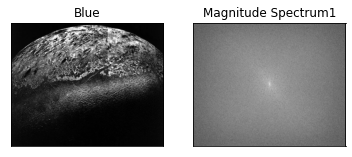

551
680


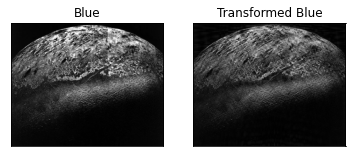

In [ ]:
moon = cv2.imread('/content/drive/MyDrive/EE610/triton_voyager2.jpg')
#source:https://stackoverflow.com/questions/60274805/splitting-of-an-rgb-image-to-r-g-b-using-opencv-python
b,g,r=cv2.split(moon)
#Blue channel
#cv2_imshow(b) 
#green channel
#cv2_imshow(g) 
#red channel
#cv2_imshow(r) 
#taking DFT of blue:
#source:https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
dft1 = cv2.dft(np.float32(b),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)

magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0],dft_shift1[:,:,1]))

plt.subplot(121),plt.imshow(b, cmap = 'gray')
plt.title('Blue'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum1'), plt.xticks([]), plt.yticks([])
plt.show()
ms1 = magnitude_spectrum1
#size of image
w1 = ms1.shape[1]
l1 = ms1.shape[0]
print(l1)
print(w1)
#centre = (l1/2,w1/2)
#print(centre)
#Ideal filter
h1 = np.ones((l1,w1,2), dtype = np.float32)
u0 = 10
v0 = 10
u1 = 15
v1 = 15
for u in range(l1):
  for v in range(w1):
    if u <= (l1/2 - u1) and (w1/2 - v0/2) <= v and v <= (w1/2 + v0/2):
      h1[u,v] = 0
    elif u >= (l1/2 + u1) and (w1/2 - v0/2) <= v and v <= (w1/2 + v0/2):
      h1[u,v] = 0
    elif v <= (w1/2 - v1) and (l1/2 - u0/2) <= u and u <= (l1/2 + u0/2):
      h1[u,v] = 0
    elif v >= (w1/2 + v1) and (l1/2 - u0/2) <= u and u <= (l1/2 + u0/2):
      h1[u,v] = 0
#taking IDFT
fshift1 = dft_shift1*h1 #masking
b1 = np.fft.ifftshift(fshift1)
bback = cv2.idft(b1)
bback = cv2.magnitude(bback[:,:,0],bback[:,:,1])

plt.subplot(121),plt.imshow(b, cmap = 'gray')
plt.title('Blue'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bback, cmap = 'gray')
plt.title('Transformed Blue'), plt.xticks([]), plt.yticks([])
plt.show()


Red Channel

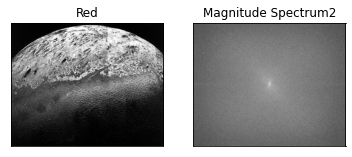

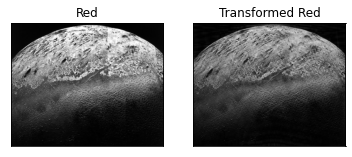

In [ ]:
#taking DFT of Red:
#source:https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
dft2 = cv2.dft(np.float32(r),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)

magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))

plt.subplot(121),plt.imshow(r, cmap = 'gray')
plt.title('Red'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Magnitude Spectrum2'), plt.xticks([]), plt.yticks([])
plt.show()
ms2 = magnitude_spectrum2
#Taking IDFT
fshift2 = dft_shift2*h1 #masking
r1 = np.fft.ifftshift(fshift2)
rback = cv2.idft(r1)
rback = cv2.magnitude(rback[:,:,0],rback[:,:,1])

plt.subplot(121),plt.imshow(r, cmap = 'gray')
plt.title('Red'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(rback, cmap = 'gray')
plt.title('Transformed Red'), plt.xticks([]), plt.yticks([])
plt.show()

Green Channel:

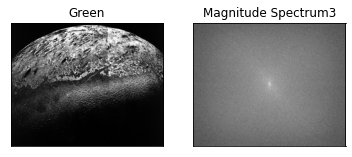

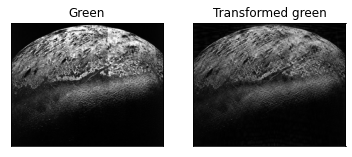

In [ ]:
#taking DFT of Green:
#source:https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
dft3 = cv2.dft(np.float32(g),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift3 = np.fft.fftshift(dft3)

magnitude_spectrum3 = 20*np.log(cv2.magnitude(dft_shift3[:,:,0],dft_shift3[:,:,1]))

plt.subplot(121),plt.imshow(g, cmap = 'gray')
plt.title('Green'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum3, cmap = 'gray')
plt.title('Magnitude Spectrum3'), plt.xticks([]), plt.yticks([])
plt.show()
ms3 = magnitude_spectrum3
#taking IDFT
fshift3 = dft_shift3*h1 #masking
g1 = np.fft.ifftshift(fshift3)
gback = cv2.idft(g1)
gback = cv2.magnitude(gback[:,:,0],gback[:,:,1])

plt.subplot(121),plt.imshow(g, cmap = 'gray')
plt.title('Green'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gback, cmap = 'gray')
plt.title('Transformed green'), plt.xticks([]), plt.yticks([])
plt.show()

Final Output:

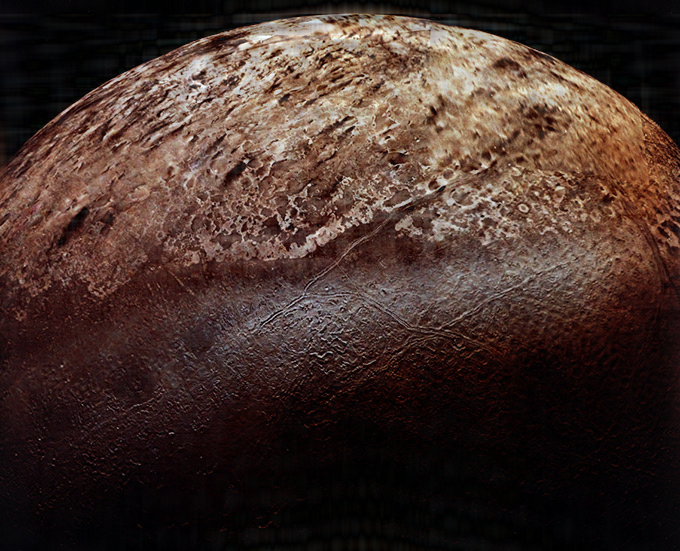

In [ ]:
final = cv2.merge([bback,gback,rback])*1/450000
cv2_imshow(final)

Q4:A picture of a car blurred due to the relative motion of the camera is given at
httos://www.ee.litb.ac.in/~asethi/Dump MakeNumberPlateReadable.jpg. Restore and enhance the picture to reveal the numbers and letters on the number (license) plate.

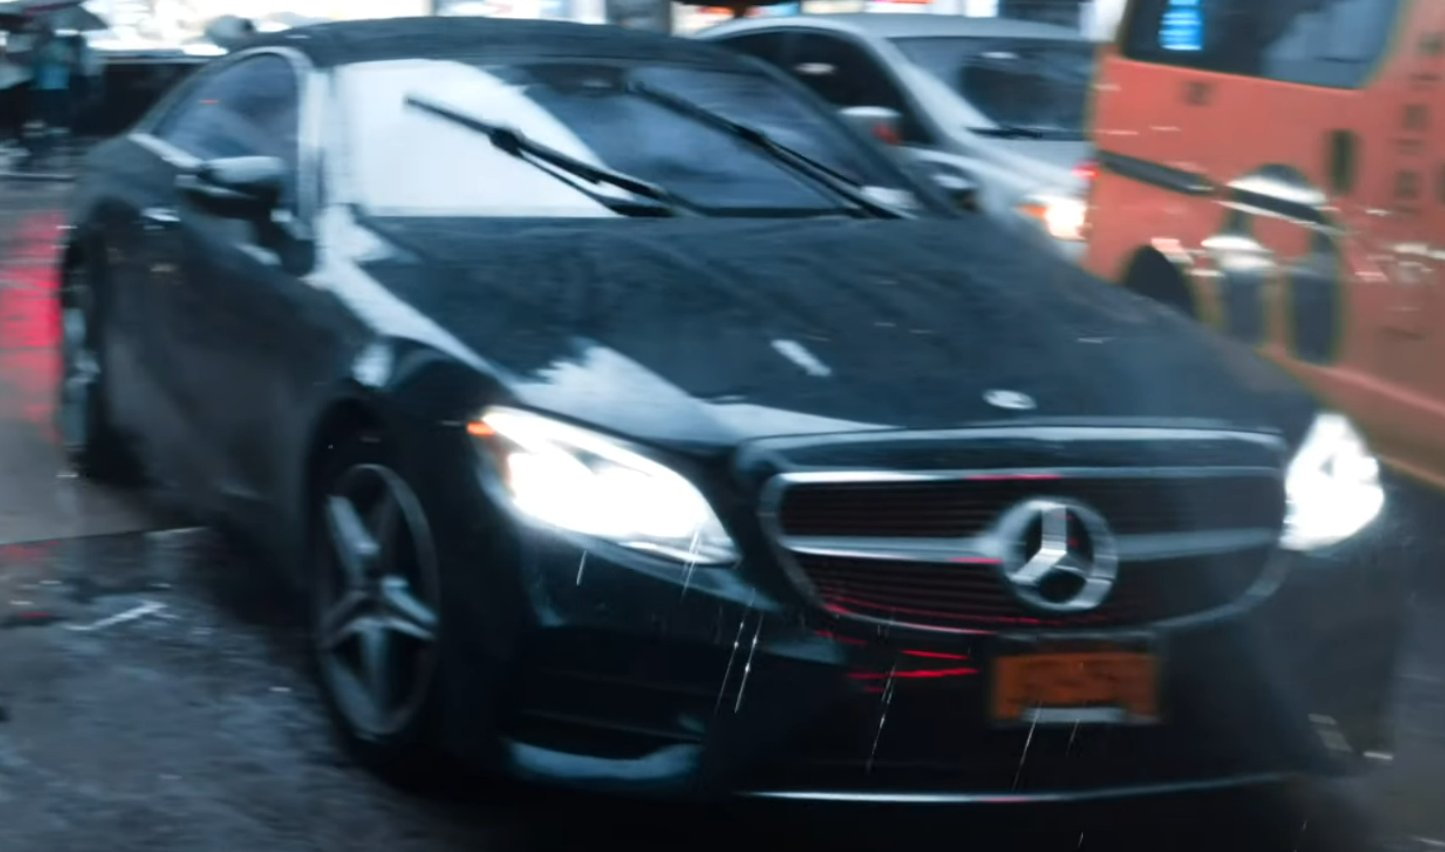

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0. 

In [ ]:
np1 = cv2.imread('/content/drive/MyDrive/EE610/NumberPlate.jpg')
#h(x,y)
cv2_imshow(np1)
kernel = np.zeros((21,21))
kernel_size = 21
for i in range(0,21):
  for j in range(0,21):
    if i == 10 and 7<= j <=13:
      kernel[i,j] = 1
    elif i == 11 and 0<= j <= 6:
      kernel[i,j] = 1
    elif i == 9 and 14<= j <= 20:
      kernel[i,j] = 1
    else:
      kernel[i, j] = 0
kernel = kernel/21
print(kernel)
kf = np.fft.fft2(kernel)
kfconj = np.conj(kf)
#source:stackoverflow
mul = np.dot(kf,kfconj)
dm = np.linalg.det(mul)
#source:geeks for geeks
#invkf = np.linalg.inv(kf)
#wienerfilter
#wf = invkf*(mul/mul+40)
#final output
#final = wf*np1



